In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_er_with_embedding(n=50, p=0.1, space_size=100):
    """
    生成 ER 网络（G(n, p)）并进行二维嵌入
    参数:
        n: 节点数量
        p: 边存在的概率
        space_size: 节点坐标范围（二维空间边长）
    返回:
        G: networkx 图对象
        positions: 节点位置字典 {节点: (x, y)}
    """
    # 1. 生成 ER 随机图
    G = nx.erdos_renyi_graph(n=n, p=p)

    # 2. 为每个节点生成二维坐标嵌入
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    # 3. 为边设置权重（欧几里得距离）
    for u, v in G.edges():
        dist = np.linalg.norm(positions[u] - positions[v])
        G[u][v]['weight'] = dist

    return G, positions


In [3]:
def plot_er_network(G, positions, n, p):
    """
    绘制 ER 网络图，并在图中显示参数信息
    """
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos=positions,
        with_labels=True,
        node_color='lightcoral',
        node_size=300,
        edge_color='gray',
        width=1.5
    )
    plt.title(f"ER Random Network (n={n}, p={p})", fontsize=14)
    plt.axis('equal')
    plt.show()

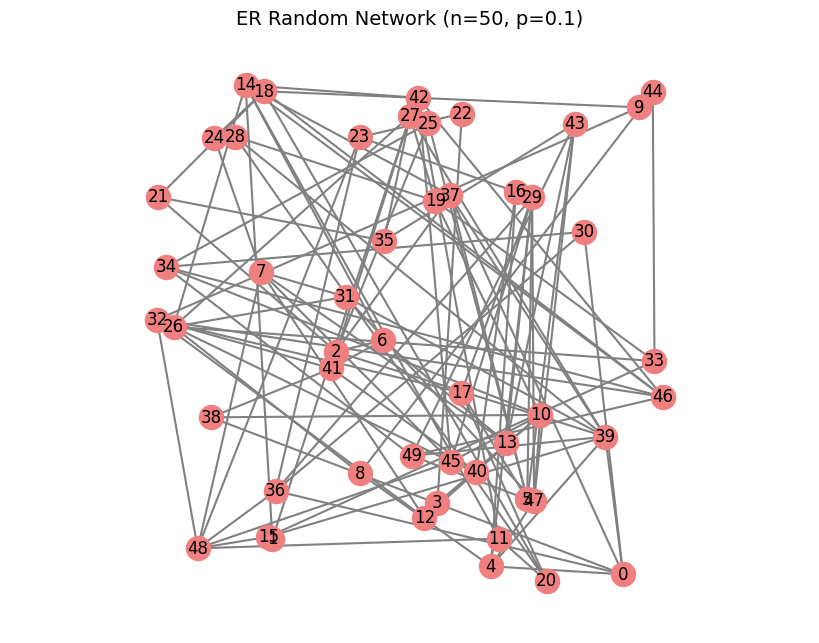

In [4]:
# 🔧 使用示例
n = 50      # 节点数
p = 0.1     # 边连接概率

G_er, pos_er = generate_er_with_embedding(n=n, p=p)
plot_er_network(G_er, pos_er, n=n, p=p)

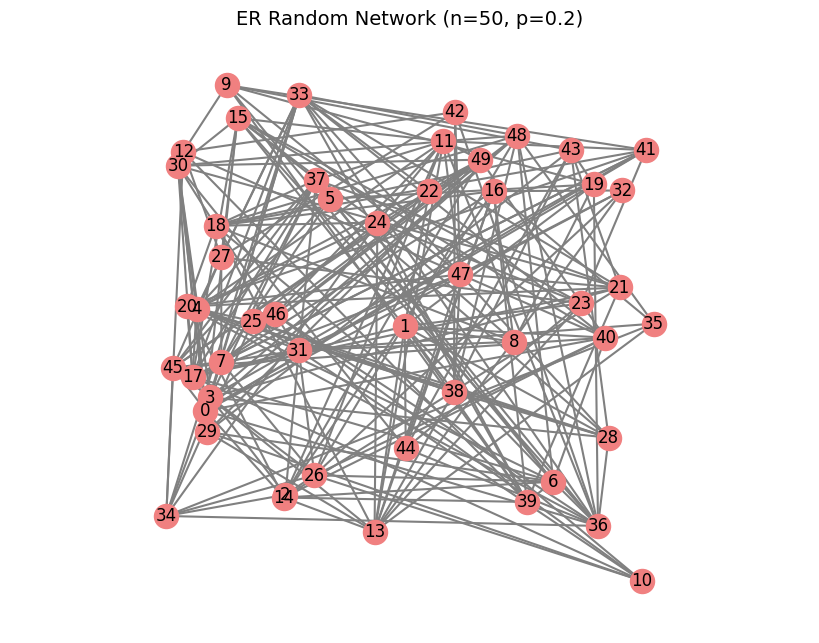

In [5]:
# 🔧 使用示例
n = 50      # 节点数
p = 0.2     # 边连接概率

G_er, pos_er = generate_er_with_embedding(n=n, p=p)
plot_er_network(G_er, pos_er, n=n, p=p)

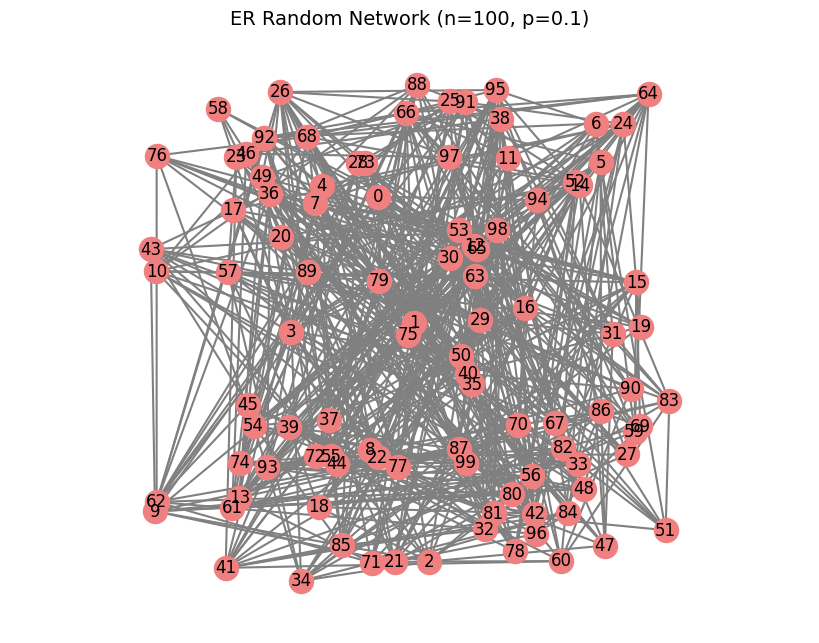

In [7]:
# 🔧 使用示例
n = 100      # 节点数
p = 0.1     # 边连接概率

G_er, pos_er = generate_er_with_embedding(n=n, p=p)
plot_er_network(G_er, pos_er, n=n, p=p)

In [8]:
def abundance_index(G):
    return sum(dict(G.degree()).values())

# 生成 ER 网络
n = 50    # 节点数
p = 0.1   # 任意两点连接的概率

G_er = nx.erdos_renyi_graph(n=n, p=p)

# 计算丰度
A = abundance_index(G_er)
print(f"ER Network Abundance A = {A}")

# 验证：应等于 2 × 边数
print(f"Check: 2 × edges = {2 * G_er.number_of_edges()}")

ER Network Abundance A = 274
Check: 2 × edges = 274
